# We List Houses
July 31, 2019<br>
Ngoc, Linear Regression

-------------------------------------------

In this notebook, we will create 5 different linear regression models and choose the best performing one.

----------------------------------------------------

# Import

In [1]:
%matplotlib inline

import os
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

sns.set_style("whitegrid")

Change directory to get source code:

In [2]:
main_path = os.getcwd()
parent_path = Path(os.getcwd()).parent
src_path = str(parent_path) + "/src/data"
os.chdir(src_path)

More import:

In [3]:
import change_directory

Change directory again to get more source code:

In [4]:
src_path = str(parent_path) + "/src/models"
os.chdir(src_path)

More import:

In [5]:
import linear_model

Change back to notebook directory:

In [6]:
os.chdir(main_path)

# Modeling

## Load data

Change directory to get data:

In [7]:
cd = change_directory.ChangeDirectory()
cd.change_to_data_dir()

Load data:

In [8]:
properties = pd.read_csv("processed/Processed_DC_Properties.csv")

Change back to notebook directory:

In [9]:
cd.change_to_notebook_dir()

## X's and y's

Since "seasonal patterns in the data are a common source of heteroscedasticity in the errors" (http://people.duke.edu/~rnau/testing.htm#homoscedasticity), we're interested in testing our models on 2 different data sets, one with the sale date information and one without it. We're also interested in testing our models on PRICE and log(PRICE) as 2 different target variables.

In [10]:
y_price = properties.PRICE
y_log_price = properties["log(PRICE)"]
X_no_saledate = properties.drop(["SOLDDAYS", "PRICE", "log(PRICE)", "SOLD_1_MIL_OR_MORE"], axis=1)
X_saledate = properties.drop(["PRICE", "log(PRICE)", "SOLD_1_MIL_OR_MORE"], axis=1)

## Baseline Model

Our Baseline Model uses the data without sale dates. Its target variable is price.

In [11]:
linreg = linear_model.LinearModeling()

Performance on training set:
     R_squared:                 0.7308282333480747
     Adj R_squared:             0.7288101458230203
Performance on test set:
     R_squared:                 0.683688061877735
     Adj R_squared:             0.6739830365035291
     Root mean squared error:   340946.21


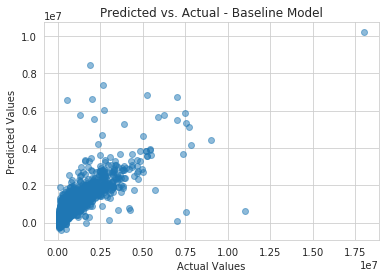

In [12]:
residuals_b, y_test_pred_b, baseline_model, saledate_b = linreg.linear_model(X_no_saledate, y_price, "Baseline Model")

The model is slightly overfitting.

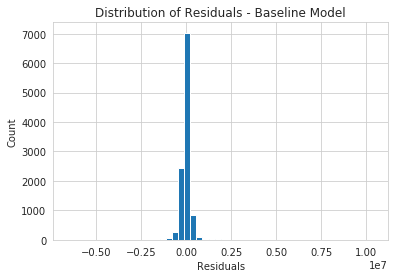

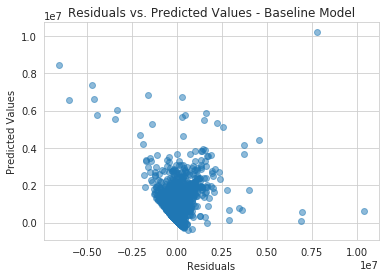

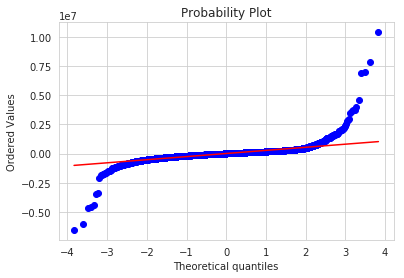

In [13]:
linreg.test_residuals(residuals_b, y_test_pred_b, "Baseline Model")

Error assumptions are violated.

## Model 1

Our Model 1 uses the data without sale dates. Its target variable is log(price).

Performance on training set:
     R_squared:                 0.7487771749612746
     Adj R_squared:             0.746893657772508
Performance on test set:
     R_squared:                 0.7470556407655482
     Adj R_squared:             0.7392948479254002
     Root mean squared error:   0.38


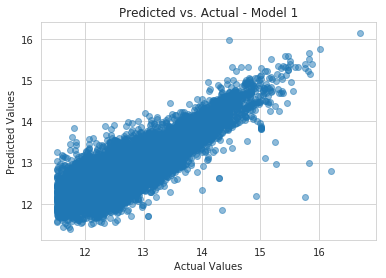

In [14]:
residuals_1, y_test_pred_1, model_1, saledate_1 = linreg.linear_model(X_no_saledate, y_log_price, "Model 1")

The model is non-overfitting.

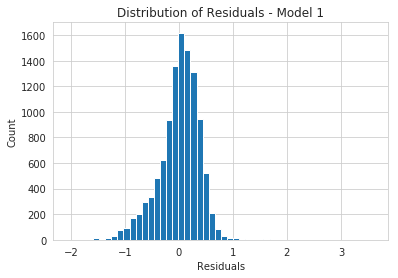

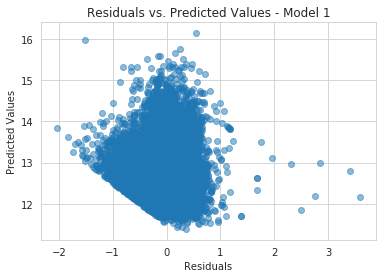

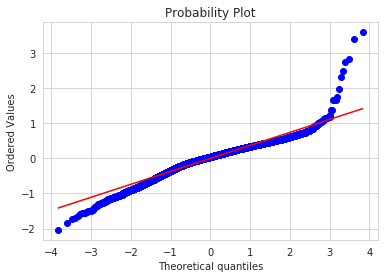

In [15]:
linreg.test_residuals(residuals_1, y_test_pred_1, "Model 1")

Error assumptions are violated.

## Model 2

Our Model 2 uses the data with sale dates. Its target variable is log(price).

Performance on training set:
     R_squared:                 0.8583973349270021
     Adj R_squared:             0.8573323822230468
Performance on test set:
     R_squared:                 0.8574068287510783
     Adj R_squared:             0.8530178922366451
     Root mean squared error:   0.28


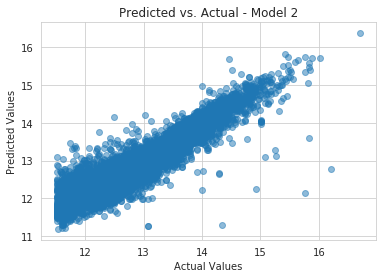

In [16]:
residuals_2, y_test_pred_2, model_2, saledate_2 = linreg.linear_model(X_saledate, y_log_price, "Model 2")

The model is non-overfitting. Root mean squared error reduces to 0.28 from 0.38. R_squared's and Adj R_squared's increase to about 0.85 from about 0.74.

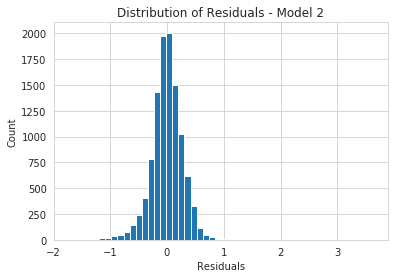

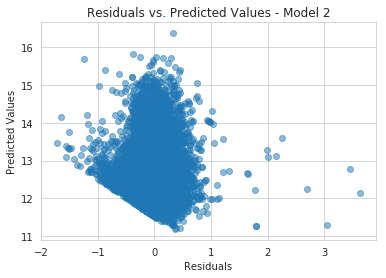

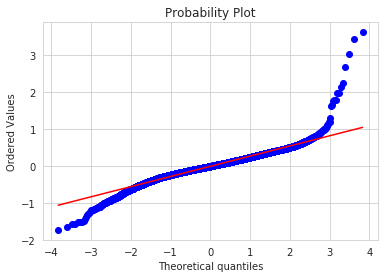

In [17]:
linreg.test_residuals(residuals_2, y_test_pred_2, "Model 2")

Error assumptions are violated.

## Model 3

Our Model 3 is the LASSO version of Model 2.

Performance on training set:
     R_squared:                 0.8557692926854924
     Adj R_squared:             0.8546845752356563
Performance on test set:
     R_squared:                 0.8569578017237719
     Adj R_squared:             0.852555044413442
     Root mean squared error:   0.28


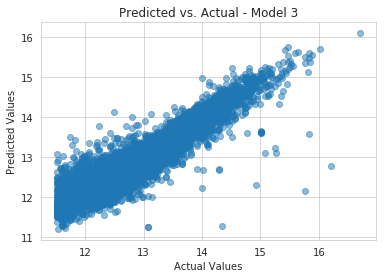

In [18]:
residuals_3, y_test_pred_3, model_3 = linreg.lasso_model(X_saledate, y_log_price, "Model 3")

No improvements from Model 2.

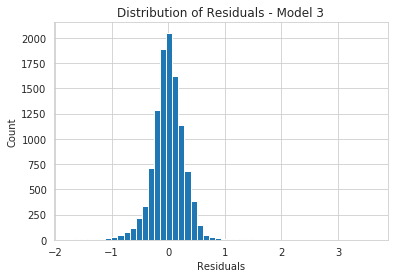

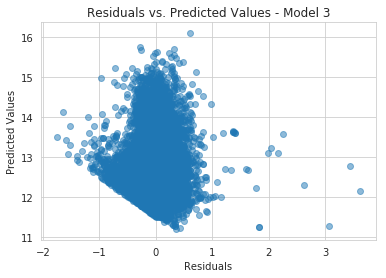

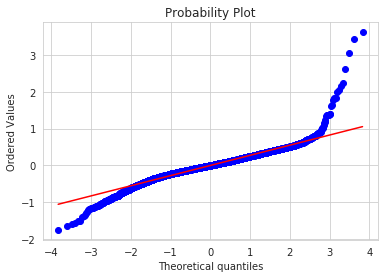

In [19]:
linreg.test_residuals(residuals_3, y_test_pred_3, "Model 3")

Error assumptions are violated.

## Model 4

Our Model 4 is the Ridge version of Model 2.

Performance on training set:
     R_squared:                 0.8583490014780721
     Adj R_squared:             0.8572836852722215
Performance on test set:
     R_squared:                 0.8576723353470681
     Adj R_squared:             0.8532915709742863
     Root mean squared error:   0.28


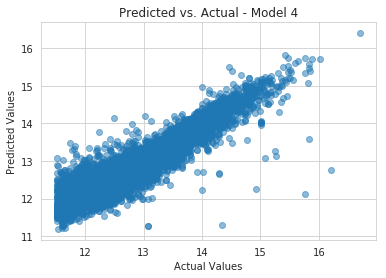

In [20]:
residuals_4, y_test_pred_4, model_4 = linreg.ridge_model(X_saledate, y_log_price, "Model 4")

No improvements from Model 2.

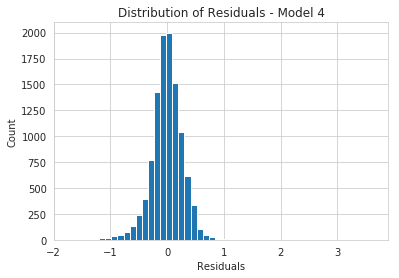

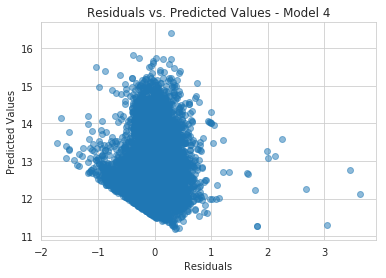

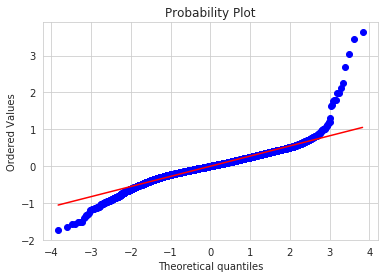

In [21]:
linreg.test_residuals(residuals_4, y_test_pred_4, "Model 4")

Error assumptions are violated.

# Winner

Our best model is Model 2 because it performs as well as the LASSO and Ridge models yet is much simpler compared to them.

Change directory to save model:

In [22]:
cd.change_to_model_dir()

Save model:

In [23]:
with open("linear_regression_model.pickle", "wb") as f:
    pickle.dump(model_2, f)

Change directory to save data:

In [24]:
cd.change_to_data_dir()

Save data (for time-series analysis):

In [25]:
saledates_residuals = pd.DataFrame(dict(s1=saledate_2, s2=residuals_2)).reset_index(drop=True)
saledates_residuals.columns = ["SALEDATE", "RESIDUAL"]

with open("processed/Saledates_Residuals.pickle", "wb") as f:
    pickle.dump(saledates_residuals, f)

Change back to notebook directory:

In [26]:
cd.change_to_notebook_dir()

# Thoughts

It looks like error assumptions are violated for linear models. Further EDA will need to be performed for better feature engineering. More advanced Machine Learning algorithms can produce better results.